<a href="https://colab.research.google.com/github/MadsFolkmann/PredictWinner/blob/main/Kopi_af_En_s%C3%A6son_test_PredrictMatchWinner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pickle import dump,load
from tensorflow.keras.layers import Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [286]:
dataFrame = pd.read_csv("/content/PremierLeague.csv")


In [287]:
dataFrame.head()

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,NaN,Arsenal,Coventry,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,NaN,Aston Villa,QPR,4,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,NaN,Chelsea,Blackburn,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,NaN,Liverpool,Sheffield Weds,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,NaN,Man City,Leeds,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [288]:
dataFrame['SeasonStartYear'] = dataFrame['Season'].apply(lambda x: int(x.split('-')[0]))
data_pre_2019 = dataFrame[dataFrame['SeasonStartYear'] < 2019]
data_post_2019 = dataFrame[dataFrame['SeasonStartYear'] >= 2019]
print("Pre-2019 dataset size:", data_pre_2019.shape)
print("Post-2019 dataset size:", data_post_2019.shape)

Pre-2019 dataset size: (9880, 44)
Post-2019 dataset size: (2099, 44)


In [289]:
data_post_2019

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints,SeasonStartYear
9880,2019-2020_Liverpool_Norwich,2019-2020,1,2019-08-09,20:00,Liverpool,Norwich,4,1,H,...,1.14,8.75,19.83,1.45,3.11,1.41,2.92,3,0,2019
9881,2019-2020_West Ham_Man City,2019-2020,1,2019-08-10,12:30,West Ham,Man City,0,5,A,...,11.84,6.28,1.25,1.51,2.77,1.48,2.65,0,3,2019
9882,2019-2020_Bournemouth_Sheffield United,2019-2020,1,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,D,...,2.01,3.53,3.83,2.00,1.99,1.90,1.93,1,1,2019
9883,2019-2020_Burnley_Southampton,2019-2020,1,2019-08-10,15:00,Burnley,Southampton,3,0,H,...,2.68,3.22,2.78,2.20,1.78,2.12,1.73,3,0,2019
9884,2019-2020_Crystal Palace_Everton,2019-2020,1,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,...,3.13,3.27,2.40,2.25,1.74,2.18,1.70,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,2024-2025_Fulham_Arsenal,2024-2025,15,2024-12-08,14:00,Fulham,Arsenal,1,1,D,...,5.40,4.24,1.61,1.84,2.17,1.78,2.06,1,1,2024
11975,2024-2025_Ipswich_Bournemouth,2024-2025,15,2024-12-08,14:00,Ipswich,Bournemouth,1,2,A,...,3.57,3.73,2.02,1.75,2.22,1.72,2.16,0,3,2024
11976,2024-2025_Leicester_Brighton,2024-2025,15,2024-12-08,14:00,Leicester,Brighton,2,2,D,...,4.48,4.02,1.75,1.63,2.44,1.59,2.39,1,1,2024
11977,2024-2025_Tottenham_Chelsea,2024-2025,15,2024-12-08,16:30,Tottenham,Chelsea,3,4,A,...,3.21,4.04,2.07,1.36,3.45,1.35,3.26,0,3,2024


In [290]:
data_post_2019.columns

Index(['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam',
       'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots',
       'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners',
       'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints',
       'SeasonStartYear'],
      dtype='object')

In [291]:
columns_to_remove = [ 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'HomeTeamCorners',
       'AwayTeamCorners',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals','SeasonStartYear', 'MarketMaxHomeTeam', 'Date', 'Referee']

data_post_2019 = data_post_2019.drop(columns=columns_to_remove)

In [292]:
data_post_2019.columns

Index(['MatchID', 'Season', 'MatchWeek', 'Time', 'HomeTeam', 'AwayTeam',
       'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult',
       'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'HomeTeamPoints',
       'AwayTeamPoints'],
      dtype='object')

In [293]:
data_post_2019.dropna(inplace=True)

In [294]:
data_for_x = data_post_2019.drop(columns=['FullTimeResult'])
X = data_for_x.iloc[ : , 1: ]
X

,Season,MatchWeek,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,...,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,HomeTeamPoints,AwayTeamPoints
9880,2019-2020,1,20:00,Liverpool,Norwich,4,1,15.0,12.0,7.0,...,2.0,0.0,0.0,1.14,10.00,19.00,1.40,3.00,3,0
9881,2019-2020,1,12:30,West Ham,Man City,0,5,5.0,14.0,3.0,...,2.0,0.0,0.0,12.00,6.50,1.22,1.44,2.75,0,3
9882,2019-2020,1,15:00,Bournemouth,Sheffield United,1,1,13.0,8.0,3.0,...,1.0,0.0,0.0,1.95,3.60,3.60,1.90,1.90,1,1
9883,2019-2020,1,15:00,Burnley,Southampton,3,0,10.0,11.0,4.0,...,0.0,0.0,0.0,2.62,3.20,2.75,2.10,1.72,3,0
9884,2019-2020,1,15:00,Crystal Palace,Everton,0,0,6.0,10.0,2.0,...,1.0,0.0,1.0,3.00,3.25,2.37,2.20,1.66,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,2024-2025,15,14:00,Fulham,Arsenal,1,1,2.0,12.0,2.0,...,2.0,0.0,0.0,5.00,4.33,1.60,1.80,2.00,1,1
11975,2024-2025,15,14:00,Ipswich,Bournemouth,1,2,18.0,22.0,5.0,...,1.0,0.0,0.0,3.50,3.75,2.00,1.73,2.10,0,3
11976,2024-2025,15,14:00,Leicester,Brighton,2,2,10.0,16.0,3.0,...,2.0,0.0,0.0,4.50,3.80,1.73,1.57,2.38,1,1
11977,2024-2025,15,16:30,Tottenham,Chelsea,3,4,13.0,17.0,5.0,...,2.0,0.0,0.0,3.40,3.90,2.00,1.36,3.20,0,3


In [295]:
# Tager alle holdene fra sæsonerne 19-25
dataFrame['SeasonStartYear'] = dataFrame['Season'].apply(lambda x: int(x.split('-')[0]))
data_filtered = dataFrame[(dataFrame['SeasonStartYear'] >= 2019) & (dataFrame['SeasonStartYear'] <= 2025)]

# Fjern 2023-2024 sæsonen fra data_post_2019, så den ikke er i træningssættet
data_post_2019_no_2023_2024 = data_post_2019[data_post_2019['Season'] != '2023-2024']
data_2023_2024 = data_post_2019[data_post_2019['Season'] == '2023-2024']

#Testing 2023-24 sæson og træning 19-23 og 24-25
X_test = data_2023_2024
X_train = data_post_2019_no_2023_2024
y_test = data_2023_2024['FullTimeResult']
y_train = data_post_2019_no_2023_2024['FullTimeResult']



# Kombiner begge kolonner og find unikke værdier
unique_teams = pd.unique(data_filtered[['HomeTeam', 'AwayTeam']].values.ravel())
unique_teams_list = sorted(unique_teams)  # Sorter alfabetisk

In [296]:
print(unique_teams)

['Liverpool' 'Norwich' 'West Ham' 'Man City' 'Bournemouth'
 'Sheffield United' 'Burnley' 'Southampton' 'Crystal Palace' 'Everton'
 'Watford' 'Brighton' 'Tottenham' 'Aston Villa' 'Leicester' 'Wolves'
 'Newcastle' 'Arsenal' 'Man United' 'Chelsea' 'Fulham' 'Leeds' 'West Brom'
 'Brentford' "Nott'm Forest" 'Luton' 'Ipswich']


In [297]:
# 20% testing og 80% træning
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )

In [298]:
print(data_post_2019_no_2023_2024.columns)

Index(['MatchID', 'Season', 'MatchWeek', 'Time', 'HomeTeam', 'AwayTeam',
       'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult',
       'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'HomeTeamPoints',
       'AwayTeamPoints'],
      dtype='object')


In [299]:
#Her laver vi tables til testning, 1 overordnet og så to med hjemme og udebane statistisk historik
test_tabel_1 = X_test[['Season',
    'MatchWeek', 'Time', 'HomeTeam', 'AwayTeam',
    'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
    'B365Over2.5Goals', 'B365Under2.5Goals'
]]

# Beregn statistik for hjemmehold
home_stats = X_test.groupby('HomeTeam').agg({
    'FullTimeHomeTeamGoals': 'mean',
    'HomeTeamShots': 'mean',
    'HomeTeamShotsOnTarget': 'mean',
    'HomeTeamFouls': 'mean',
    'HomeTeamYellowCards': 'mean',
    'HomeTeamRedCards': 'mean',
    'HomeTeamPoints': 'mean'
}).reset_index()

# Omdøb kolonner for at indikere, at de er for hjemmeholds gns stats
home_stats.rename(columns={
    'HomeTeam': 'Team',
    'FullTimeHomeTeamGoals': 'AvgHomeGoals',
    'HomeTeamShots': 'AvgHomeShots',
    'HomeTeamShotsOnTarget': 'AvgHomeShotsOnTarget',
    'HomeTeamFouls': 'AvgHomeFouls',
    'HomeTeamYellowCards': 'AvgHomeYellowCards',
    'HomeTeamRedCards': 'AvgHomeRedCards',
    'HomeTeamPoints': 'AvgHomePoints'
}, inplace=True)

# Beregn statistik for udehold
away_stats = X_test.groupby('AwayTeam').agg({
    'FullTimeAwayTeamGoals': 'mean',
    'AwayTeamShots': 'mean',
    'AwayTeamShotsOnTarget': 'mean',
    'AwayTeamFouls': 'mean',
    'AwayTeamYellowCards': 'mean',
    'AwayTeamRedCards': 'mean',
    'AwayTeamPoints': 'mean'
}).reset_index()

# Omdøb kolonner for at indikere, at de er for udeholds gns stats
away_stats.rename(columns={
    'AwayTeam': 'Team',
    'FullTimeAwayTeamGoals': 'AvgAwayGoals',
    'AwayTeamShots': 'AvgAwayShots',
    'AwayTeamShotsOnTarget': 'AvgAwayShotsOnTarget',
    'AwayTeamFouls': 'AvgAwayFouls',
    'AwayTeamYellowCards': 'AvgAwayYellowCards',
    'AwayTeamRedCards': 'AvgAwayRedCards',
    'AwayTeamPoints': 'AvgAwayPoints'
}, inplace=True)



#Her sammensætter vi de to tabeller

#Merge hjemmebanestatistik ind for hjemmeholdet
test_tabel_1 = test_tabel_1.merge(home_stats, left_on='HomeTeam', right_on='Team', how='left')
# Fjern unødvendig 'Team'-kolonne efter merge
test_tabel_1.drop(columns=['Team'], inplace=True)

# Step 3: Merge udebanestatistik ind for udeholdet
test_tabel_1 = test_tabel_1.merge(away_stats, left_on='AwayTeam', right_on='Team', how='left')
# Fjern unødvendig 'Team'-kolonne efter merge
test_tabel_1.drop(columns=['Team'], inplace=True)

test_tabel_1

,Season,MatchWeek,Time,HomeTeam,AwayTeam,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,...,AvgHomeYellowCards,AvgHomeRedCards,AvgHomePoints,AvgAwayGoals,AvgAwayShots,AvgAwayShotsOnTarget,AvgAwayFouls,AvgAwayYellowCards,AvgAwayRedCards,AvgAwayPoints
0,2023-2024,1,20:00,Burnley,Man City,8.00,5.50,1.33,1.67,2.20,...,1.421053,0.052632,0.526316,2.368421,17.157895,7.842105,7.315789,1.526316,0.000000,2.315789
1,2023-2024,1,12:30,Arsenal,Nott'm Forest,1.18,7.00,15.00,1.44,2.75,...,1.789474,0.052632,2.473684,1.157895,10.368421,3.842105,11.789474,2.473684,0.052632,0.842105
2,2023-2024,1,15:00,Bournemouth,West Ham,2.70,3.40,2.55,1.90,2.00,...,1.894737,0.105263,1.421053,1.526316,11.157895,3.368421,10.368421,2.052632,0.105263,1.210526
3,2023-2024,1,15:00,Brighton,Luton,1.33,5.50,9.00,1.62,2.30,...,1.894737,0.105263,1.578947,1.263158,8.789474,3.000000,11.684211,1.789474,0.000000,0.526316
4,2023-2024,1,15:00,Everton,Fulham,2.20,3.40,3.30,2.01,1.89,...,1.736842,0.000000,1.473684,1.263158,12.842105,4.894737,10.736842,2.157895,0.105263,0.947368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2023-2024,38,16:00,Crystal Palace,Aston Villa,1.85,4.33,3.60,1.40,3.00,...,1.947368,0.052632,1.473684,1.473684,12.315789,4.473684,10.578947,2.421053,0.052632,1.473684
376,2023-2024,38,16:00,Liverpool,Wolves,1.17,8.00,15.00,1.22,4.33,...,1.368421,0.052632,2.526316,1.263158,10.736842,3.947368,12.736842,2.578947,0.105263,1.000000
377,2023-2024,38,16:00,Luton,Fulham,2.90,3.90,2.20,1.44,2.75,...,1.947368,0.000000,0.842105,1.263158,12.842105,4.894737,10.736842,2.157895,0.105263,0.947368
378,2023-2024,38,16:00,Man City,West Ham,1.08,12.00,21.00,1.20,4.50,...,1.157895,0.105263,2.473684,1.526316,11.157895,3.368421,10.368421,2.052632,0.105263,1.210526


In [300]:
# Ligesom med test tabellen vil vi gerne have de historiske stats med i træning:
home_stats_train = X_train.groupby('HomeTeam').agg({
    'FullTimeHomeTeamGoals': 'mean',
    'HomeTeamShots': 'mean',
    'HomeTeamShotsOnTarget': 'mean',
    'HomeTeamFouls': 'mean',
    'HomeTeamYellowCards': 'mean',
    'HomeTeamRedCards': 'mean',
    'HomeTeamPoints': 'mean'
}).reset_index()

away_stats_train = X_train.groupby('AwayTeam').agg({
    'FullTimeAwayTeamGoals': 'mean',
    'AwayTeamShots': 'mean',
    'AwayTeamShotsOnTarget': 'mean',
    'AwayTeamFouls': 'mean',
    'AwayTeamYellowCards': 'mean',
    'AwayTeamRedCards': 'mean',
    'AwayTeamPoints': 'mean'
}).reset_index()

# Omnavngiv kolonnerne, så de matcher testdataene
home_stats_train.rename(columns={
    'HomeTeam': 'Team',
    'FullTimeHomeTeamGoals': 'AvgHomeGoals',
    'HomeTeamShots': 'AvgHomeShots',
    'HomeTeamShotsOnTarget': 'AvgHomeShotsOnTarget',
    'HomeTeamFouls': 'AvgHomeFouls',
    'HomeTeamYellowCards': 'AvgHomeYellowCards',
    'HomeTeamRedCards': 'AvgHomeRedCards',
    'HomeTeamPoints': 'AvgHomePoints'
}, inplace=True)

away_stats_train.rename(columns={
    'AwayTeam': 'Team',
    'FullTimeAwayTeamGoals': 'AvgAwayGoals',
    'AwayTeamShots': 'AvgAwayShots',
    'AwayTeamShotsOnTarget': 'AvgAwayShotsOnTarget',
    'AwayTeamFouls': 'AvgAwayFouls',
    'AwayTeamYellowCards': 'AvgAwayYellowCards',
    'AwayTeamRedCards': 'AvgAwayRedCards',
    'AwayTeamPoints': 'AvgAwayPoints'
}, inplace=True)

# Merge gennemsnittene for hjemmehold og udehold i træningsdataene
X_train = X_train.merge(home_stats_train, left_on='HomeTeam', right_on='Team', how='left')
X_train.drop(columns=['Team'], inplace=True)

X_train = X_train.merge(away_stats_train, left_on='AwayTeam', right_on='Team', how='left')
X_train.drop(columns=['Team'], inplace=True)

In [301]:
X_train = pd.get_dummies(X_train)  # One-hot encoding af ALLE kolonner
test_tabel_1 = pd.get_dummies(test_tabel_1)

In [302]:
common_columns = X_train.columns.intersection(test_tabel_1.columns)
X_train = X_train[common_columns]
test_tabel_1 = test_tabel_1[common_columns]

In [303]:
# Smide alle holdene på begge x, så de har samme kolonner
for team in unique_teams:
    # Tilføj kolonner for hjemmehold
    if f'HomeTeam_{team}' not in X_train.columns:
        X_train[f'HomeTeam_{team}'] = 0
    if f'HomeTeam_{team}' not in test_tabel_1.columns:
        test_tabel_1[f'HomeTeam_{team}'] = 0

    # Tilføj kolonner for udehold
    if f'AwayTeam_{team}' not in X_train.columns:
        X_train[f'AwayTeam_{team}'] = 0
    if f'AwayTeam_{team}' not in test_tabel_1.columns:
        test_tabel_1[f'AwayTeam_{team}'] = 0

In [304]:
#Gemmer odds til senere brug:
if isinstance(test_tabel_1, pd.DataFrame):
    odds_columns = ['B365HomeTeam', 'B365Draw', 'B365AwayTeam']
    original_odds = test_tabel_1[odds_columns].copy()
    original_odds_array = original_odds.values
elif isinstance(test_tabel_1, np.ndarray):
    original_odds_array = test_tabel_1[:, [list(test_tabel_1_columns).index(col) for col in ['B365HomeTeam', 'B365Draw', 'B365AwayTeam']]]
else:
    raise TypeError("test_tabel_1 skal være en Pandas DataFrame eller et NumPy array.")

In [305]:
X_train_columns = X_train.columns    #Gemmer kolonnerne inden vi konvetere dem
y_train_original = y_train.copy()

In [306]:
# Identificer holdkolonnerne
team_columns = [col for col in X_train.columns if 'HomeTeam_' in col or 'AwayTeam_' in col]

# Identificer de øvrige kolonner (ikke-holdkolonner)
other_columns = [col for col in X_train.columns if col not in team_columns]

In [307]:
X_train_other = X_train[other_columns].values
test_tabel_1_other = test_tabel_1[other_columns].values

In [308]:
#Her finder vi de mest valuable stats
desired_number_of_features = 8

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_other, y_train_original)

selector = SelectFromModel(forest, prefit=True, max_features=desired_number_of_features)

X_train_other_reduced = selector.transform(X_train_other)
test_tabel_1_other_reduced = selector.transform(test_tabel_1_other)

# Konverter til float32 EFTER feature selection
X_train_other_reduced = X_train_other_reduced.astype(np.float32)
test_tabel_1_other_reduced = test_tabel_1_other_reduced.astype(np.float32)

In [309]:
# Se hvad de bedste features er
selected_other_features_mask = selector.get_support()
selected_other_features = np.array(other_columns)[selected_other_features_mask]

print("De udvalgte features er:")
for feature in selected_other_features:
    print(feature)

De udvalgte features er:
MatchWeek
B365HomeTeam
B365Draw
B365AwayTeam
B365Over2.5Goals
B365Under2.5Goals
AvgHomePoints
AvgAwayPoints


In [310]:
# KOMBINER DE UDVALGTE KOLONNER MED HOLDKOLONNERNE
selected_features = np.concatenate((team_columns, selected_other_features))

In [311]:
# Skab de reducerede DataFrames
X_train_reduced = X_train[selected_features]
test_tabel_1_reduced = test_tabel_1[selected_features]

In [312]:
X_train_reduced = X_train_reduced.values
test_tabel_1_reduced = test_tabel_1_reduced.values
y_train = y_train.values
y_test = y_test.values

In [313]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [314]:
scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train_reduced)
test_tabel_1_reduced = scaler.fit_transform(test_tabel_1_reduced)

In [315]:
#dump(scaler, open('scaler.pkl', 'wb'))

In [316]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [317]:
model.fit(X_train_reduced, y_train, epochs=200, verbose=1)

Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3260 - loss: 1.4687
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3427 - loss: 1.3554
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3327 - loss: 1.2856
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3788 - loss: 1.1933
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3721 - loss: 1.1761
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3794 - loss: 1.1765
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3997 - loss: 1.1248
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4045 - loss: 1.1168
Epoch 9/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4438 - loss: 1.0982
Epoch 10/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4482 - loss: 1.0715
Epoch 11/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4376 - loss: 1.0781
Epoch 12/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

<Axes: >

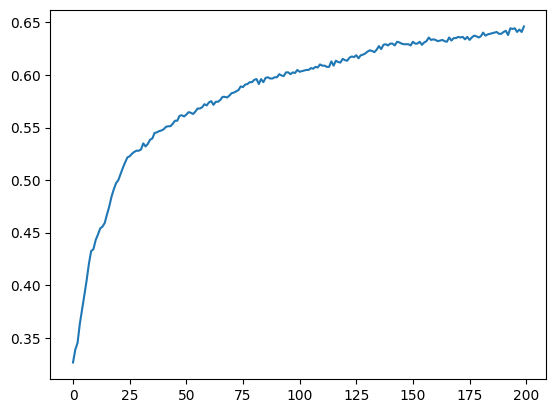

In [318]:
accuracy = model.history.history['accuracy']
sns.lineplot(x=range(len(accuracy)),y=accuracy)

<Axes: >

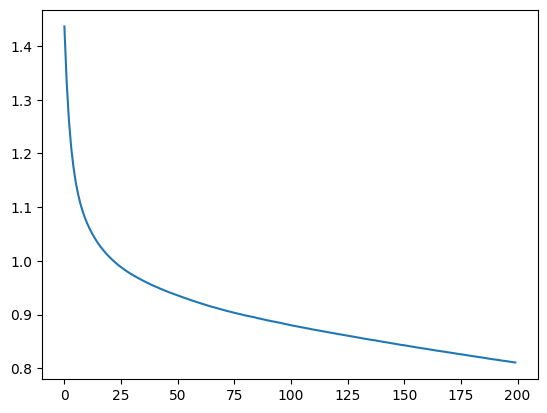

In [319]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [320]:
model.evaluate(test_tabel_1_reduced,y_test,verbose=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 0.9362  


[0.9716029763221741, 0.5815789699554443]

In [321]:
# Forudsig sandsynligheder med modellen (på det SKALEREDE og REDUCEREDE datasæt)
y_pred_probs = model.predict(test_tabel_1_reduced)

# Konverter sandsynligheder til klasseindeks
y_pred = y_pred_probs.argmax(axis=1)

# Beregn profit
indsats = 2
total_profit = 0
profit_hjemme = 0
profit_uafgjort = 0
profit_udebane = 0
antal_hjemme_korrekt = 0
antal_uafgjort_korrekt = 0
antal_udebane_korrekt = 0

result_mapping = {'H': 0, 'D': 1, 'A': 2}
result_mapping_reverse = {0:'H', 1:'D', 2:'A'} #Laver en reverse mapping så vi kan printe H, D og A

for i in range(min(len(y_test), len(original_odds_array))):
    prediction = y_pred[i]
    true_result = np.argmax(y_test.iloc[i].values)
    true_result_string = result_mapping_reverse[true_result]

    try:
        if prediction == result_mapping['H']:
            odds = original_odds_array[i, 0]
        elif prediction == result_mapping['D']:
            odds = original_odds_array[i, 1]
        elif prediction == result_mapping['A']:
            odds = original_odds_array[i, 2]
        else:
            odds = 0
    except IndexError:
        print(f"IndexError ved index {i}. original_odds_array har muligvis ikke nok rækker.")
        continue
    except ValueError:
        print(f"ValueError ved index {i}. Odds kunne ikke konverteres til numerisk værdi.")
        continue

    if prediction == true_result:
        profit = (indsats * odds) - indsats
        total_profit += profit
        if true_result == result_mapping['H']:
            profit_hjemme += profit
            antal_hjemme_korrekt += 1
        elif true_result == result_mapping['D']:
            profit_uafgjort += profit
            antal_uafgjort_korrekt += 1
        elif true_result == result_mapping['A']:
            profit_udebane += profit
            antal_udebane_korrekt += 1
    else:
        total_profit -= indsats

print(f"Total profit: {total_profit:.2f} euro")
print(f"Profit ved hjemmesejre: {profit_hjemme:.2f} euro (Antal korrekte: {antal_hjemme_korrekt})")
print(f"Profit ved uafgjorte: {profit_uafgjort:.2f} euro (Antal korrekte: {antal_uafgjort_korrekt})")
print(f"Profit ved udebane sejre: {profit_udebane:.2f} euro (Antal korrekte: {antal_udebane_korrekt})")

# Beregn confusion matrix (som før)
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred)
print("Confusion Matrix:")
print(cm)
print("-------------")

print("\nClassification Report:")
accuracy = accuracy_score(y_test.values.argmax(axis=1), y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test.values.argmax(axis=1), y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Total profit: 2127.02 euro
Profit ved hjemmesejre: 675.98 euro (Antal korrekte: 73)
Profit ved uafgjorte: 98.06 euro (Antal korrekte: 18)
Profit ved udebane sejre: 1670.98 euro (Antal korrekte: 130)
Confusion Matrix:
[[ 73  12  38]
 [ 30  18  34]
 [ 30  15 130]]
-------------

Classification Report:
Accuracy: 0.5816
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       123
           1       0.40      0.22      0.28        82
           2       0.64      0.74      0.69       175

    accuracy                           0.58       380
   macro avg       0.53      0.52      0.51       380
weighted avg       0.56      0.58      0.56       380



In [322]:
def predict_single_match(model, scaler, selected_features, matchweek, home_team, away_team,
                         home_odds, draw_odds, away_odds, over_2_5_odds, under_2_5_odds,
                         historical_data):

    # Beregn hjemme- og udebanehistorik
    home_points_series = historical_data[historical_data['HomeTeam'] == home_team]['HomeTeamPoints']
    if home_points_series.empty:
        print(f"No HomeTeamPoints data found for home team: {home_team}")
        return None, None
    avg_home_points = home_points_series.mean()

    away_points_series = historical_data[historical_data['AwayTeam'] == away_team]['AwayTeamPoints']
    if away_points_series.empty:
        print(f"No AwayTeamPoints data found for away team: {away_team}")
        return None, None
    avg_away_points = away_points_series.mean()


    # Opret en DataFrame for den nye kamp
    match_data = pd.DataFrame({
        'MatchWeek': [matchweek],
        'B365HomeTeam': [float(home_odds)],
        'B365Draw': [float(draw_odds)],
        'B365AwayTeam': [float(away_odds)],
        'B365Over2.5Goals': [float(over_2_5_odds)],
        'B365Under2.5Goals': [float(under_2_5_odds)],
        'AvgHomePoints': [avg_home_points],
        'AvgAwayPoints': [avg_away_points],
        'HomeTeam': [home_team],
        'AwayTeam': [away_team],
    })

    # Lav en liste over alle unikke hold i dataen
    all_teams = list(set(historical_data['HomeTeam'].unique()) | set(historical_data['AwayTeam'].unique()))

    # Tilføj en kolonne for hvert hold og sæt den til 1 hvis holdet er hjemme- eller udehold
    for team in all_teams:
        match_data[f'HomeTeam_{team}'] = 1 if team == home_team else 0
        match_data[f'AwayTeam_{team}'] = 1 if team == away_team else 0

    # One-hot encoding for hold - sikrer at kun 1 for hjem og ude hold, så rest bliver 0
    match_data = match_data.drop(columns=['HomeTeam', 'AwayTeam'], errors='ignore')  # Fjern gamle strenge kolonner

    # Sikre fælles features mellem model og input data
    for col in selected_features:
        if col not in match_data.columns:
            match_data[col] = 0  # Tilføj manglende kolonner med 0

    # Reducer til de ønskede features
    match_data = match_data[selected_features]

    # Skaler input data
    scaled_data = scaler.transform(match_data)

    # Forudsig resultater
    probabilities = model.predict(scaled_data)[0]  # Dette returnerer sandsynligheder
    predicted_result = probabilities.argmax()  # Find klassen med højeste sandsynlighed

    result_mapping = {
        0: away_team,       # Udehold vinder
        1: "Draw",          # Uafgjort
        2: home_team        # Hjemmehold vinder
    }
    probabilities_percent_ordered = [round(probabilities[2] * 100, 2), # Home
                                     round(probabilities[1] * 100, 2), # Draw
                                     round(probabilities[0] * 100, 2)] # Away

    return result_mapping[predicted_result], probabilities_percent_ordered

In [323]:
home_team = "Man United"
away_team = "Aston Villa"
home_odds = 2.3
draw_odds = 3.40
away_odds = 3.00
over_2_5_odds = 1.72
under_2_5_odds = 2.1
matchweek = 22
historical_data=data_post_2019

predicted_result, probabilities_percent_ordered = predict_single_match(
    model, scaler, selected_features, matchweek, home_team, away_team,
    home_odds, draw_odds, away_odds, over_2_5_odds, under_2_5_odds,
    historical_data
)
print(f"Predicted result: {predicted_result}")
print(f"Probabilities: {probabilities_percent_ordered}% [Home, Draw, Away]")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted result: Man United
Probabilities: [50.79, 30.13, 19.08]% [Home, Draw, Away]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [324]:
unique_teams

array(['Liverpool', 'Norwich', 'West Ham', 'Man City', 'Bournemouth',
       'Sheffield United', 'Burnley', 'Southampton', 'Crystal Palace',
       'Everton', 'Watford', 'Brighton', 'Tottenham', 'Aston Villa',
       'Leicester', 'Wolves', 'Newcastle', 'Arsenal', 'Man United',
       'Chelsea', 'Fulham', 'Leeds', 'West Brom', 'Brentford',
       "Nott'm Forest", 'Luton', 'Ipswich'], dtype=object)